### https://www.kaggle.com/prathamtripathi/drug-classification

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
import os

pd.pandas.set_option("display.max_columns",None)
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/drug200.csv


In [4]:
data = pd.read_csv('./data/drug200.csv')
t = 'Drug'
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


<AxesSubplot:>

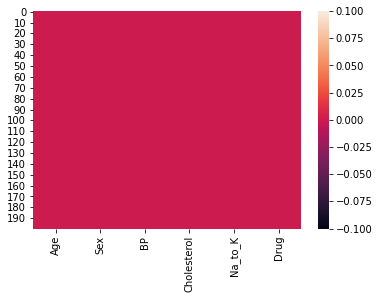

In [31]:
sns.heatmap(data.isna())

In [42]:
df = data.copy()

In [43]:
df = pd.get_dummies(df,columns=['BP','Cholesterol'])
df

,Age,Sex,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,F,25.355,DrugY,1,0,0,1,0
1,47,M,13.093,drugC,0,1,0,1,0
2,47,M,10.114,drugC,0,1,0,1,0
3,28,F,7.798,drugX,0,0,1,1,0
4,61,F,18.043,DrugY,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
195,56,F,11.567,drugC,0,1,0,1,0
196,16,M,12.006,drugC,0,1,0,1,0
197,52,M,9.894,drugX,0,0,1,1,0
198,23,M,14.020,drugX,0,0,1,0,1


In [45]:
df['is_male'] = np.where(df['Sex'] == 'M',1,0)
df

,Age,Sex,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,is_male
0,23,F,25.355,DrugY,1,0,0,1,0,0
1,47,M,13.093,drugC,0,1,0,1,0,1
2,47,M,10.114,drugC,0,1,0,1,0,1
3,28,F,7.798,drugX,0,0,1,1,0,0
4,61,F,18.043,DrugY,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
195,56,F,11.567,drugC,0,1,0,1,0,0
196,16,M,12.006,drugC,0,1,0,1,0,1
197,52,M,9.894,drugX,0,0,1,1,0,1
198,23,M,14.020,drugX,0,0,1,0,1,1


In [46]:
df.drop('Sex',axis=1,inplace=True)

In [47]:
df

,Age,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,is_male
0,23,25.355,DrugY,1,0,0,1,0,0
1,47,13.093,drugC,0,1,0,1,0,1
2,47,10.114,drugC,0,1,0,1,0,1
3,28,7.798,drugX,0,0,1,1,0,0
4,61,18.043,DrugY,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
195,56,11.567,drugC,0,1,0,1,0,0
196,16,12.006,drugC,0,1,0,1,0,1
197,52,9.894,drugX,0,0,1,1,0,1
198,23,14.020,drugX,0,0,1,0,1,1


In [24]:
data[t].value_counts()

DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

<AxesSubplot:xlabel='Drug', ylabel='count'>

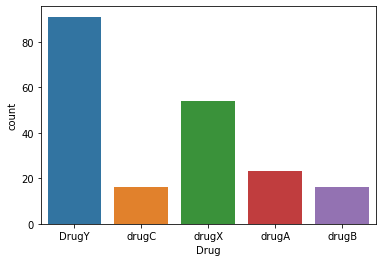

In [23]:
sns.countplot(data=df,x=t)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  wa

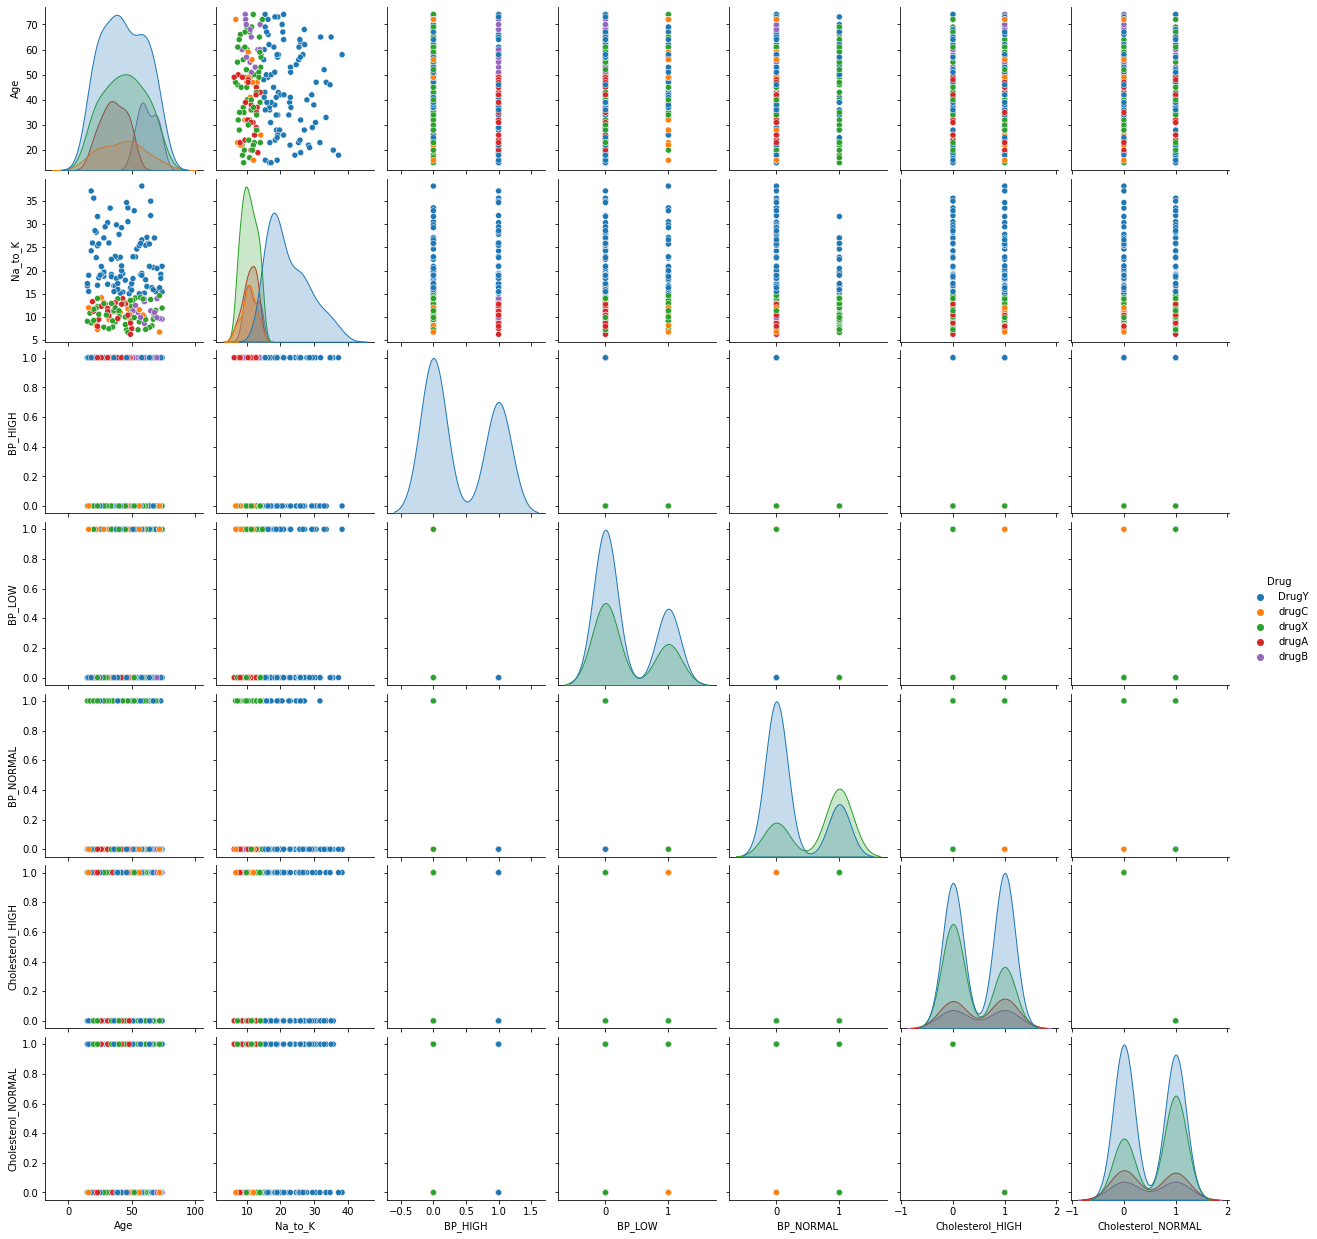

In [22]:
sns.pairplot(data=df,hue=t)

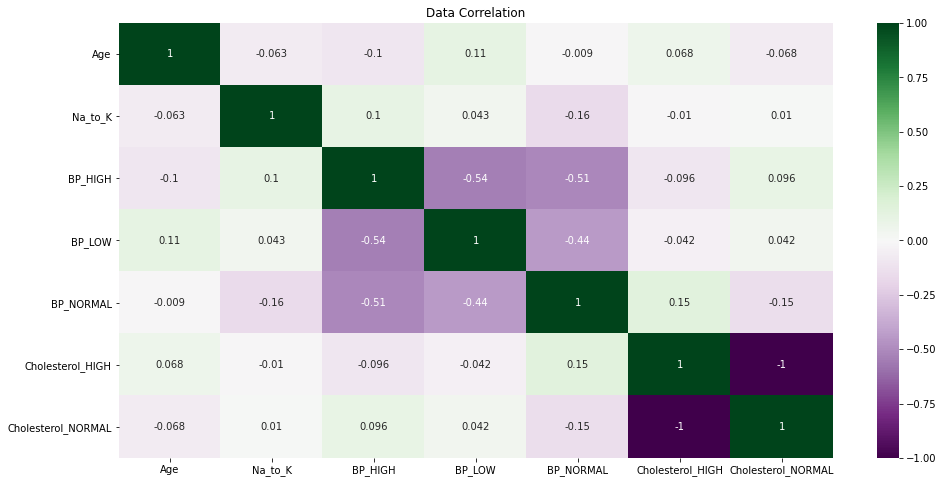

In [30]:
plt.figure(figsize=(16,8))
sns.heatmap(data=df.corr(),annot=True,cmap='PRGn')
plt.title("Data Correlation")
plt.show()

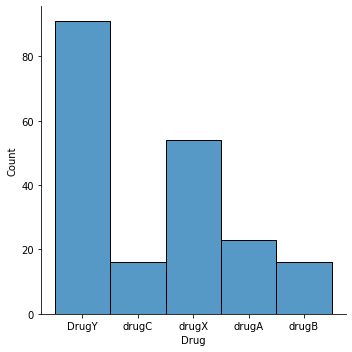

In [9]:
sns.displot(data=data,x=t)

# AGE

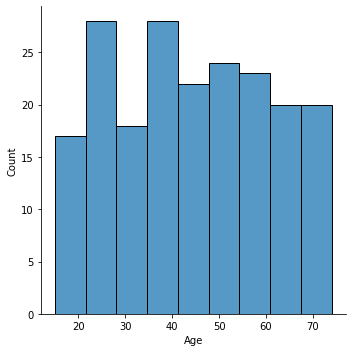

In [32]:
sns.displot(data=df,x='Age')

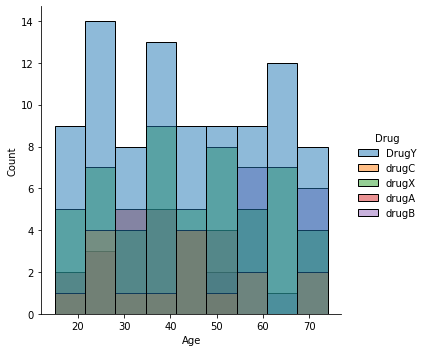

In [40]:
sns.displot(data=df,x='Age',hue=t)

In [49]:
df.to_csv('data/data_model.csv',index=False)